# Análisis exploratorio de datos
Análisis preliminar del Dataset de cáncer de mama de Wisconsin (WBCD).
- Carga de datos
- Exploración inicial (visualización de primeras filas)
- Limpieza básica (renombrar columnas, eliminar ID, codificar diagnóstico)
- Análisis estadístico descriptivo
- Identificación de valores faltantes
- Distribución de clases (benigno vs maligno)
- Análisis de correlaciones entre características

## Importación de librerías

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from tabulate import tabulate
import sys

sys.path.append('..')  # Añade el directorio padre al path
from utils.statistical_functions import *
from utils.config import FEATURE_NAMES

## Configuración de visualización

In [2]:
# Un "magic command" de Jupyter que permite mostrar los gráficos de matplotlib directamente en el
# notebook, justo debajo de la celda que los genera.
%matplotlib inline

# Mejora la apariencia predeterminada de los gráficos de matplotlib
plt.style.use('ggplot')  # Estilo de gráficos

## Carga de Datos

In [3]:
# Ruta al archivo de datos
data_path = "../data/raw/data.csv"

# Cargar el dataset sin cabecera
df = pd.read_csv(data_path, header=None)

### Mostrar las primeras filas

In [4]:
print("Primeras filas del dataset:")
display(df.head(21))

Primeras filas del dataset:


,0,1,2,3,4,5,6,7,8,9,...,22,23,24,25,26,27,28,29,30,31
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.26540,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.18600,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.24300,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.25750,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.16250,0.2364,0.07678
5,843786,M,12.45,15.70,82.57,477.1,0.12780,0.17000,0.15780,0.08089,...,15.47,23.75,103.40,741.6,0.1791,0.5249,0.5355,0.17410,0.3985,0.12440
6,844359,M,18.25,19.98,119.60,1040.0,0.09463,0.10900,0.11270,0.07400,...,22.88,27.66,153.20,1606.0,0.1442,0.2576,0.3784,0.19320,0.3063,0.08368
7,84458202,M,13.71,20.83,90.20,577.9,0.11890,0.16450,0.09366,0.05985,...,17.06,28.14,110.60,897.0,0.1654,0.3682,0.2678,0.15560,0.3196,0.11510
8,844981,M,13.00,21.82,87.50,519.8,0.12730,0.19320,0.18590,0.09353,...,15.49,30.73,106.20,739.3,0.1703,0.5401,0.5390,0.20600,0.4378,0.10720
9,84501001,M,12.46,24.04,83.97,475.9,0.11860,0.23960,0.22730,0.08543,...,15.09,40.68,97.65,711.4,0.1853,1.0580,1.1050,0.22100,0.4366,0.20750


### Mostrar información básica del dataset 

In [5]:
print("\nInformación del dataset:\n")
df.info()


Información del dataset:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 32 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       569 non-null    int64  
 1   1       569 non-null    object 
 2   2       569 non-null    float64
 3   3       569 non-null    float64
 4   4       569 non-null    float64
 5   5       569 non-null    float64
 6   6       569 non-null    float64
 7   7       569 non-null    float64
 8   8       569 non-null    float64
 9   9       569 non-null    float64
 10  10      569 non-null    float64
 11  11      569 non-null    float64
 12  12      569 non-null    float64
 13  13      569 non-null    float64
 14  14      569 non-null    float64
 15  15      569 non-null    float64
 16  16      569 non-null    float64
 17  17      569 non-null    float64
 18  18      569 non-null    float64
 19  19      569 non-null    float64
 20  20      569 non-null    float64
 21  21      569 

### Formando el DataFrame
El archivo `data.csv` no tiene cabecera. Contiene 32 columnas: 
- Columna 0: ID (se eliminará).
- Columna 1: Diagnosis ('M' = maligno, 'B' = benigno, se mapeará a 1 (M) y 0 (B)).
- Columnas 2 a 31: 30 características numéricas (f01 a f30).

In [6]:
# Asigna nombres de columnas (ID, diagnosis, f01-f30)
column_names = ['ID', 'diagnosis'] + [f'f{i:02d}' for i in range(1, 31)]
df.columns = column_names

# Eliminar la columna ID (no aporta información predictiva)
df = df.drop('ID', axis=1)

# Mapear la columna 'diagnosis': 'M' -> 1 (Maligno), 'B' -> 0 (Benigno) 
df['diagnosis'] = df['diagnosis'].map({'M': 1, 'B': 0 })

# Mostrar las primeras filas del dataset procesado
print("Primeras filas del dataset (tras eliminar ID y mapear diagnosis):")
display(df.head(21))

Primeras filas del dataset (tras eliminar ID y mapear diagnosis):


,diagnosis,f01,f02,f03,f04,f05,f06,f07,f08,f09,...,f21,f22,f23,f24,f25,f26,f27,f28,f29,f30
0,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.26540,0.4601,0.11890
1,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.18600,0.2750,0.08902
2,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.24300,0.3613,0.08758
3,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.25750,0.6638,0.17300
4,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.16250,0.2364,0.07678
5,1,12.45,15.70,82.57,477.1,0.12780,0.17000,0.15780,0.08089,0.2087,...,15.47,23.75,103.40,741.6,0.1791,0.5249,0.5355,0.17410,0.3985,0.12440
6,1,18.25,19.98,119.60,1040.0,0.09463,0.10900,0.11270,0.07400,0.1794,...,22.88,27.66,153.20,1606.0,0.1442,0.2576,0.3784,0.19320,0.3063,0.08368
7,1,13.71,20.83,90.20,577.9,0.11890,0.16450,0.09366,0.05985,0.2196,...,17.06,28.14,110.60,897.0,0.1654,0.3682,0.2678,0.15560,0.3196,0.11510
8,1,13.00,21.82,87.50,519.8,0.12730,0.19320,0.18590,0.09353,0.2350,...,15.49,30.73,106.20,739.3,0.1703,0.5401,0.5390,0.20600,0.4378,0.10720
9,1,12.46,24.04,83.97,475.9,0.11860,0.23960,0.22730,0.08543,0.2030,...,15.09,40.68,97.65,711.4,0.1853,1.0580,1.1050,0.22100,0.4366,0.20750


### Información sobre el DataFrame

In [7]:
# Mostrar información básica del dataset
print("\nInformación del dataset:\n")
df.info()


Información del dataset:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   diagnosis  569 non-null    int64  
 1   f01        569 non-null    float64
 2   f02        569 non-null    float64
 3   f03        569 non-null    float64
 4   f04        569 non-null    float64
 5   f05        569 non-null    float64
 6   f06        569 non-null    float64
 7   f07        569 non-null    float64
 8   f08        569 non-null    float64
 9   f09        569 non-null    float64
 10  f10        569 non-null    float64
 11  f11        569 non-null    float64
 12  f12        569 non-null    float64
 13  f13        569 non-null    float64
 14  f14        569 non-null    float64
 15  f15        569 non-null    float64
 16  f16        569 non-null    float64
 17  f17        569 non-null    float64
 18  f18        569 non-null    float64
 19  f19        569 non-null

### Dimensiones del DataFrame

In [8]:
print("Dimensiones del DataFrame:")
print(f"- Número de muestras: {df.shape[0]}")
print(f"- Número de características: {df.shape[1] - 1}")  # Restamos 1 para excluir 'diagnosis'

Dimensiones del DataFrame:
- Número de muestras: 569
- Número de características: 30


## Nombre de las 30 características


| **Mean**     |                |                             | I     | **Error**    |                |                             | I     | **Worst**    |                  |                                |
|--------------|----------------|-----------------------------|-------|--------------|----------------|-----------------------------|-------|--------------|------------------|--------------------------------|
| Nombre Corto | Característica | Nombre de la Característica | **I** | Nombre Corto | Característica | Nombre de la Característica | **I** | Nombre Corto | Característica   | Nombre de la Característica    |
|--------------|----------------|-----------------------------|       |--------------|----------------|-----------------------------|       |--------------|------------------|--------------------------------|
| f01       | feature01      | mean radius                 | **I** | f11       | feature11      | radius error                | **I** |  f21      | feature21        | worst radius                   |
| f02       | feature02      | mean texture                | **I** | f12       | feature12      | texture error               | **I** |  f22      | feature22        | worst texture                  |
| f03       | feature03      | mean perimeter              | **I** | f13       | feature13      | perimeter error             | **I** |  f23      | feature23        | worst perimeter                |
| f04       | feature04      | mean area                   | **I** | f14       | feature14      | area error                  | **I** |  f24      | feature24        | worst area                     |
| f05       | feature05      | mean smoothness             | **I** | f15       | feature15      | smoothness error            | **I** |  f25      | feature25        | worst smoothness               |
| f06       | feature06      | mean compactness            | **I** | f16       | feature16      | compactness error           | **I** |  f26      | feature26        | worst compactness              |
| f07       | feature07      | mean concavity              | **I** | f17       | feature17      | concavity error             | **I** |  f27      | feature27        | worst concavity                |
| f08       | feature08      | mean concave points         | **I** | f18       | feature18      | concave points error        | **I** |  f28      | feature28        | worst concave points           |
| f09       | feature09      | mean symmetry               | **I** | f19       | feature19      | symmetry error              | **I** |  f29      | feature29        | worst symmetry                 |
| f10       | feature10      | mean fractal dimension      | **I** | f20       | feature20      | fractal dimension error     | **I** |  f30      | feature30        | worst fractal dimension        |


**Nota 1**: 
Donde dice "error" se refiere al "standar error".

El "standard error" (error estándar) se define como la "sample standard deviation" (desviación estándar de la muestra) dividida por la raíz cuadrada del tamaño de la muestra.

La fórmula es:

$$ SE = \frac{s}{\sqrt{n}} $$

Donde:
- $SE$ es el standard error (error estándar)
- $s$ es la sample standard deviation (desviación estándar de la muestra)
- $n$ es el tamaño de la muestra

La fórmula para la desviación estándar de la muestra ($s$) es la raíz cuadrada de la varianza muestral:

$$ s = \sqrt{\frac{\sum_{i=1}^{n} (x_i - \bar{x})^2}{n - 1}} $$

Donde $x_i$ son los valores individuales, $\bar{x}$ es la media de la muestra, y $n$ es el tamaño de la muestra.

**Nota 2**: 
Donde dice "worst" se refiere a "peor" o mayor (media de los tres
valores más grandes) de cada característica.

# Estadística descriptiva
- Descripción de los datos utilizando una serie de métricas que permiten describir las columnas del Dataset.
- Se utilizan funciones personalizadas en lugar de métodos incorporados.

In [9]:
def calculate_metrics(df):
    """Calculate metrics for float columns."""
    # Select numeric columns (float64)
    numeric_columns = df.select_dtypes(include=['float64']).columns
    metrics = {}
    
    for col in numeric_columns:
        values = df[col].dropna().tolist()
        metrics[col] = {
            "Count": ft_count(values),
            "Mean": ft_mean(values),
            "Std": ft_std(values),
            "Min": ft_min(values),
            "25%": ft_percentile(values, 0.25),
            "50%": ft_median(values),
            "75%": ft_percentile(values, 0.75),
            "Max": ft_max(values),
            "IQR": ft_iqr(values),
            "Skewness": ft_skewness(values),
            "Kurtosis": ft_kurtosis(values),
            "CV": ft_cv(values)
        }
    
    return metrics

In [10]:
'''def print_metrics_table(metrics):
    """Print calculated metrics in a formatted table."""
    table_data = []
    headers = [""] + list(metrics.keys())
    
    metrics_to_display = [
        "Count", "Mean", "Std", "Min", "25%", "50%", "75%", "Max",
        "IQR", "Skewness", "Kurtosis", "CV"
    ]
    
    for metric in metrics_to_display:
        row = [metric]
        for col in metrics:
            value = metrics[col][metric]
            row.append(f"{value:.6f}" if isinstance(value, float) else f"{value}")
        table_data.append(row)
    
    print(tabulate(table_data, headers=headers, tablefmt="fancy_grid"))'''

'def print_metrics_table(metrics):\n    """Print calculated metrics in a formatted table."""\n    table_data = []\n    headers = [""] + list(metrics.keys())\n    \n    metrics_to_display = [\n        "Count", "Mean", "Std", "Min", "25%", "50%", "75%", "Max",\n        "IQR", "Skewness", "Kurtosis", "CV"\n    ]\n    \n    for metric in metrics_to_display:\n        row = [metric]\n        for col in metrics:\n            value = metrics[col][metric]\n            row.append(f"{value:.6f}" if isinstance(value, float) else f"{value}")\n        table_data.append(row)\n    \n    print(tabulate(table_data, headers=headers, tablefmt="fancy_grid"))'

In [11]:
def print_metrics_table_transposed(metrics):
    """Print calculated metrics with features as rows instead of columns with all metrics."""
    # Preparar los datos para tabla transpuesta
    table_data = []
    
    # Lista completa de métricas a mostrar
    metrics_to_display = [
        "Count", "Mean", "Std", "Min", "25%", "50%", "75%", "Max",
        "IQR", "Skewness", "Kurtosis", "CV"
    ]
    
    for col in metrics:
        row = [col, FEATURE_NAMES.get(col, "")]  # Nombre corto y nombre completo
        for metric in metrics_to_display:
            value = metrics[col][metric]
            row.append(f"{value:.6f}" if isinstance(value, float) else f"{value}")
        table_data.append(row)
    
    # Crear lista de encabezados
    headers = ["Feature", "Description"] + metrics_to_display
    
    # Lista de alineaciones para cada columna (todas centradas)
    column_alignments = ["center"] * (len(metrics_to_display) + 2)
    
    # Usar el parámetro colalign para centrar las cabeceras
    print(tabulate(table_data, headers=headers, tablefmt="fancy_grid", 
                  colalign=tuple(column_alignments)))

In [12]:
def analyze_dataframe(df):
    """Analyze dataframe by loading and calculating metrics."""
    metrics = calculate_metrics(df)
    print_metrics_table_transposed(metrics)

analyze_dataframe(df)

╒═══════════╤═════════════════════════╤═════════╤══════════╤══════════╤══════════╤══════════╤══════════╤══════════╤═════════╤══════════╤════════════╤════════════╤══════════╕
│  Feature  │       Description       │  Count  │   Mean   │   Std    │   Min    │   25%    │   50%    │   75%    │   Max   │   IQR    │  Skewness  │  Kurtosis  │    CV    │
╞═══════════╪═════════════════════════╪═════════╪══════════╪══════════╪══════════╪══════════╪══════════╪══════════╪═════════╪══════════╪════════════╪════════════╪══════════╡
│    f01    │       mean radius       │   569   │ 14.1273  │ 3.52405  │  6.981   │   11.7   │  13.37   │  15.78   │  28.11  │   4.08   │  0.937417  │  0.814142  │ 0.24945  │
├───────────┼─────────────────────────┼─────────┼──────────┼──────────┼──────────┼──────────┼──────────┼──────────┼─────────┼──────────┼────────────┼────────────┼──────────┤
│    f02    │      mean texture       │   569   │ 19.2896  │ 4.30104  │   9.71   │  16.17   │  18.84   │   21.8   │  39.28  │   5.

### Valores faltantes
Se confirma que no hay valores nulos en el Dataset.

In [13]:
# Verificar valores faltantes
print("\nValores faltantes por columna:")
display(df.isnull().sum())


Valores faltantes por columna:


diagnosis    0
f01          0
f02          0
f03          0
f04          0
f05          0
f06          0
f07          0
f08          0
f09          0
f10          0
f11          0
f12          0
f13          0
f14          0
f15          0
f16          0
f17          0
f18          0
f19          0
f20          0
f21          0
f22          0
f23          0
f24          0
f25          0
f26          0
f27          0
f28          0
f29          0
f30          0
dtype: int64

## Guardar el DataSet Limpio
Guardar el dataset limpio:
- sin ID
- con cabecera 'diagnosis' + 'f01' + 'f02' + ··· + 'f30'
- diagnosis mapeada
- grabado en el archivo: '../data/processed/cleaned_data.csv'

In [14]:
df.to_csv('../data/processed/cleaned_data.csv', index=False)

### Distribución de clases
- Analizamos la columna 'diagnosis' para ver la proporción de casos benignos (0) y malignos (1) en el dataset.
- Se muestra la proporción de casos benignos vs. malignos (aproximadamente 63% vs. 37%).

Distribución de clases:
Benignos (0): 357 (62.74%)
Malignos (1): 212 (37.26%)


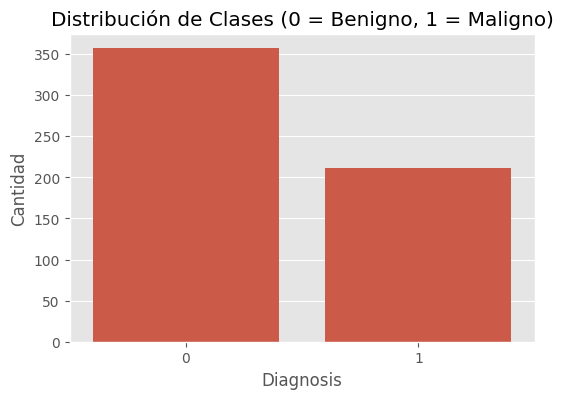

In [15]:
# Contar la distribución de clases
class_counts = df['diagnosis'].value_counts()

# Mostrar resultados
print("Distribución de clases:")
print(f"Benignos (0): {class_counts[0]} ({class_counts[0]/len(df)*100:.2f}%)")
print(f"Malignos (1): {class_counts[1]} ({class_counts[1]/len(df)*100:.2f}%)")

# Visualización con un gráfico de barras
plt.figure(figsize=(6, 4))
sns.countplot(x='diagnosis', data=df)
plt.title('Distribución de Clases (0 = Benigno, 1 = Maligno)')
plt.xlabel('Diagnosis')
plt.ylabel('Cantidad')
plt.show()

## Análisis de Correlaciones
- Se identifican las características altamente correlacionadas (|corr| > 0.95)
- Se presentan de forma organizada, incluyendo sus nombres completos.

In [16]:
# Calcular correlaciones entre características (solo columnas tipo float)
numeric_columns = df.select_dtypes(include=['float64']).columns
correlations = df[numeric_columns].corr()

# Identificar las características más correlacionadas
threshold = 0.95

# La correlación entre f01 - f03 es la misma que la que hay entre f03 - f01
# solo se imprime una de las dos, ya que son la misma
print("\nCaracterísticas altamente correlacionadas (|corr| > 0.95):")
# Obtener solo el triángulo superior de la matriz de correlación
upper_triangle = []
for i in range(len(correlations.columns)):
    for j in range(i + 1, len(correlations.columns)):
        corr = correlations.iloc[i, j]
        if abs(corr) > threshold:
            upper_triangle.append((
                correlations.columns[i],
                correlations.columns[j],
                corr
            ))

# Ordenar por valor absoluto de correlación
upper_triangle.sort(key=lambda x: abs(x[2]), reverse=True)

# Mostrar resultados ordenados
table_data = [[feat1, feat2, f"{corr:.3f}", f"{FEATURE_NAMES[feat1]}", f"{FEATURE_NAMES[feat2]}"] 
              for feat1, feat2, corr in upper_triangle]
print(tabulate(table_data, headers=["FeatA", "FeatB", "Corr", "Feature A", "Feature B"], tablefmt="fancy_grid"))


Características altamente correlacionadas (|corr| > 0.95):
╒═════════╤═════════╤════════╤═════════════════╤═════════════════╕
│ FeatA   │ FeatB   │   Corr │ Feature A       │ Feature B       │
╞═════════╪═════════╪════════╪═════════════════╪═════════════════╡
│ f01     │ f03     │  0.998 │ mean radius     │ mean perimeter  │
├─────────┼─────────┼────────┼─────────────────┼─────────────────┤
│ f21     │ f23     │  0.994 │ worst radius    │ worst perimeter │
├─────────┼─────────┼────────┼─────────────────┼─────────────────┤
│ f01     │ f04     │  0.987 │ mean radius     │ mean area       │
├─────────┼─────────┼────────┼─────────────────┼─────────────────┤
│ f03     │ f04     │  0.987 │ mean perimeter  │ mean area       │
├─────────┼─────────┼────────┼─────────────────┼─────────────────┤
│ f21     │ f24     │  0.984 │ worst radius    │ worst area      │
├─────────┼─────────┼────────┼─────────────────┼─────────────────┤
│ f23     │ f24     │  0.978 │ worst perimeter │ worst area      │
├─

### Resultados coherentes
Los resultados reflejan lo esperado al observar céludas de forma más o menos circular, donde se mide el radio de la célula ($r$), su perímetro ($2 \pi r$) y su área ($\pi r^2$).
- mean radius (f01), mean perimeter (f03) y mean area (f04) están muy correlacionados (casi 0.99) porque son medidas geométricas relacionadas.
- Lo mismo ocurre con sus versiones "worst" (f21, f23, f24).
- Los errores (f11, f13, f14) también muestran alta correlación, lo cual tiene sentido por su naturaleza derivada.